In [1]:
import os

os.chdir("../../")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_handling import ingestion

sns.set_theme(context="paper", font_scale=1.15, style="whitegrid")

In [2]:
ncg_prices, gaspool_prices, the_prices = ingestion.read_imbalance_prices()
natural_gas_prices = pd.concat([(ncg_prices + gaspool_prices).dropna() / 2, the_prices]).sort_index()

electricity_prices = ingestion.read_electricity_prices()
crude_oil_prices = ingestion.read_crude_oil_prices()

In [8]:
price_comparison = pd.concat(
    [
        natural_gas_prices,
        electricity_prices,
        crude_oil_prices,
    ],
    axis=1,
    keys=["Natural gas", "Electricity", "Crude oil"],
)

Text(0.5, 1.0, 'Correlation matrix for energy commodity prices')

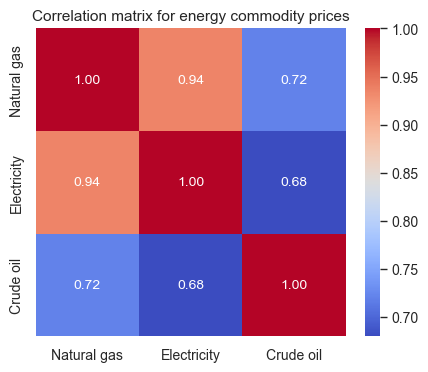

In [13]:
fig, ax = plt.subplots(figsize=(5, 4))

sns.heatmap(
    price_comparison.corr(),
    ax=ax,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"fontsize": 10},
)

plt.title("Correlation matrix for energy commodity prices")